In [1]:
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
from keras.utils import plot_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
a = '/home/sanarip03/Desktop/archive(6)/train/'
path = Path(a)
path.ls()
np.random.seed(40)
item_tfms = [Resize(224)]
data = ImageDataLoaders.from_folder(path, train = '.', valid_pct=0.2,
                                   size=224,
                                  item_tfms=item_tfms)

In [3]:
learn = cnn_learner(data, models.resnet18, model_dir='./model', path = Path("."))

/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/venv/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResN

SuggestedLRs(valley=0.002511886414140463)

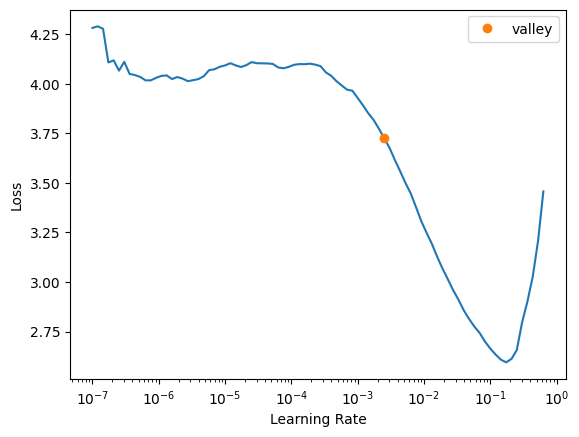

In [4]:
learn.lr_find()

In [5]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(50,slice(lr1,lr2))

In [6]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

/home/dan/Desktop/rikitwiki/venv/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/Desktop/rikitwiki/venv/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/Desktop/rikitwiki/venv/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/Desktop/rikitwiki/venv/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/Desktop/rikitwiki/venv/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/Deskt

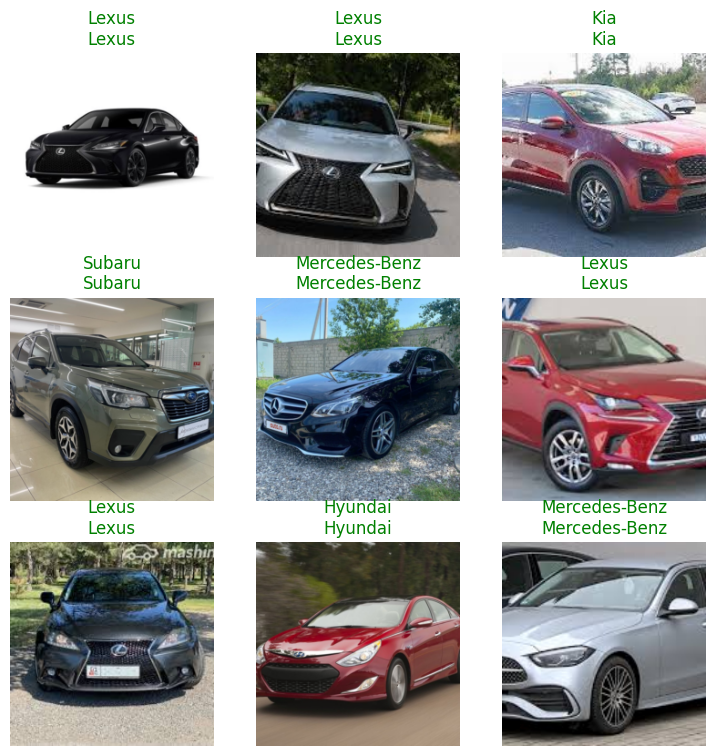

In [7]:
learn.show_results()

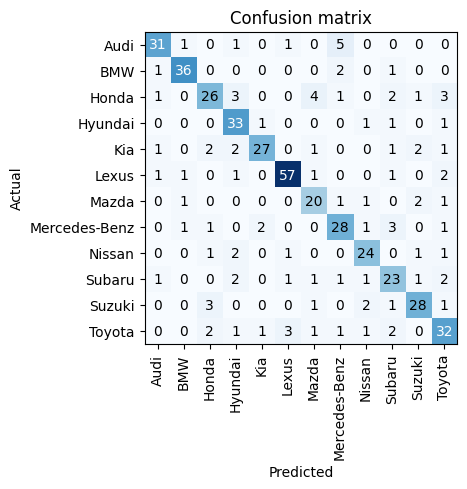

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [9]:
# Counting the values of losses
interp.top_losses(largest=True)

(TensorBase([3.5583e+01, 1.0108e+01, 9.8355e+00, 9.0372e+00, 8.0678e+00,
             7.7119e+00, 7.5209e+00, 7.0959e+00, 6.1157e+00, 6.1129e+00,
             5.1107e+00, 5.0954e+00, 5.0605e+00, 5.0410e+00, 4.6439e+00,
             4.6264e+00, 4.4904e+00, 4.2432e+00, 4.2259e+00, 4.0745e+00,
             4.0288e+00, 3.9522e+00, 3.9489e+00, 3.8568e+00, 3.8331e+00,
             3.8236e+00, 3.8165e+00, 3.7327e+00, 3.6703e+00, 3.5647e+00,
             3.5397e+00, 3.4399e+00, 3.3370e+00, 3.2694e+00, 3.2362e+00,
             3.1902e+00, 3.1361e+00, 3.0910e+00, 3.0733e+00, 3.0370e+00,
             2.8723e+00, 2.7362e+00, 2.7092e+00, 2.6882e+00, 2.6378e+00,
             2.6069e+00, 2.5833e+00, 2.5710e+00, 2.5462e+00, 2.5359e+00,
             2.4444e+00, 2.4369e+00, 2.4208e+00, 2.4157e+00, 2.4065e+00,
             2.3632e+00, 2.3493e+00, 2.1518e+00, 2.1247e+00, 2.1057e+00,
             2.1005e+00, 2.0979e+00, 2.0836e+00, 2.0480e+00, 1.9948e+00,
             1.9151e+00, 1.9110e+00, 1.7677e+00, 1.

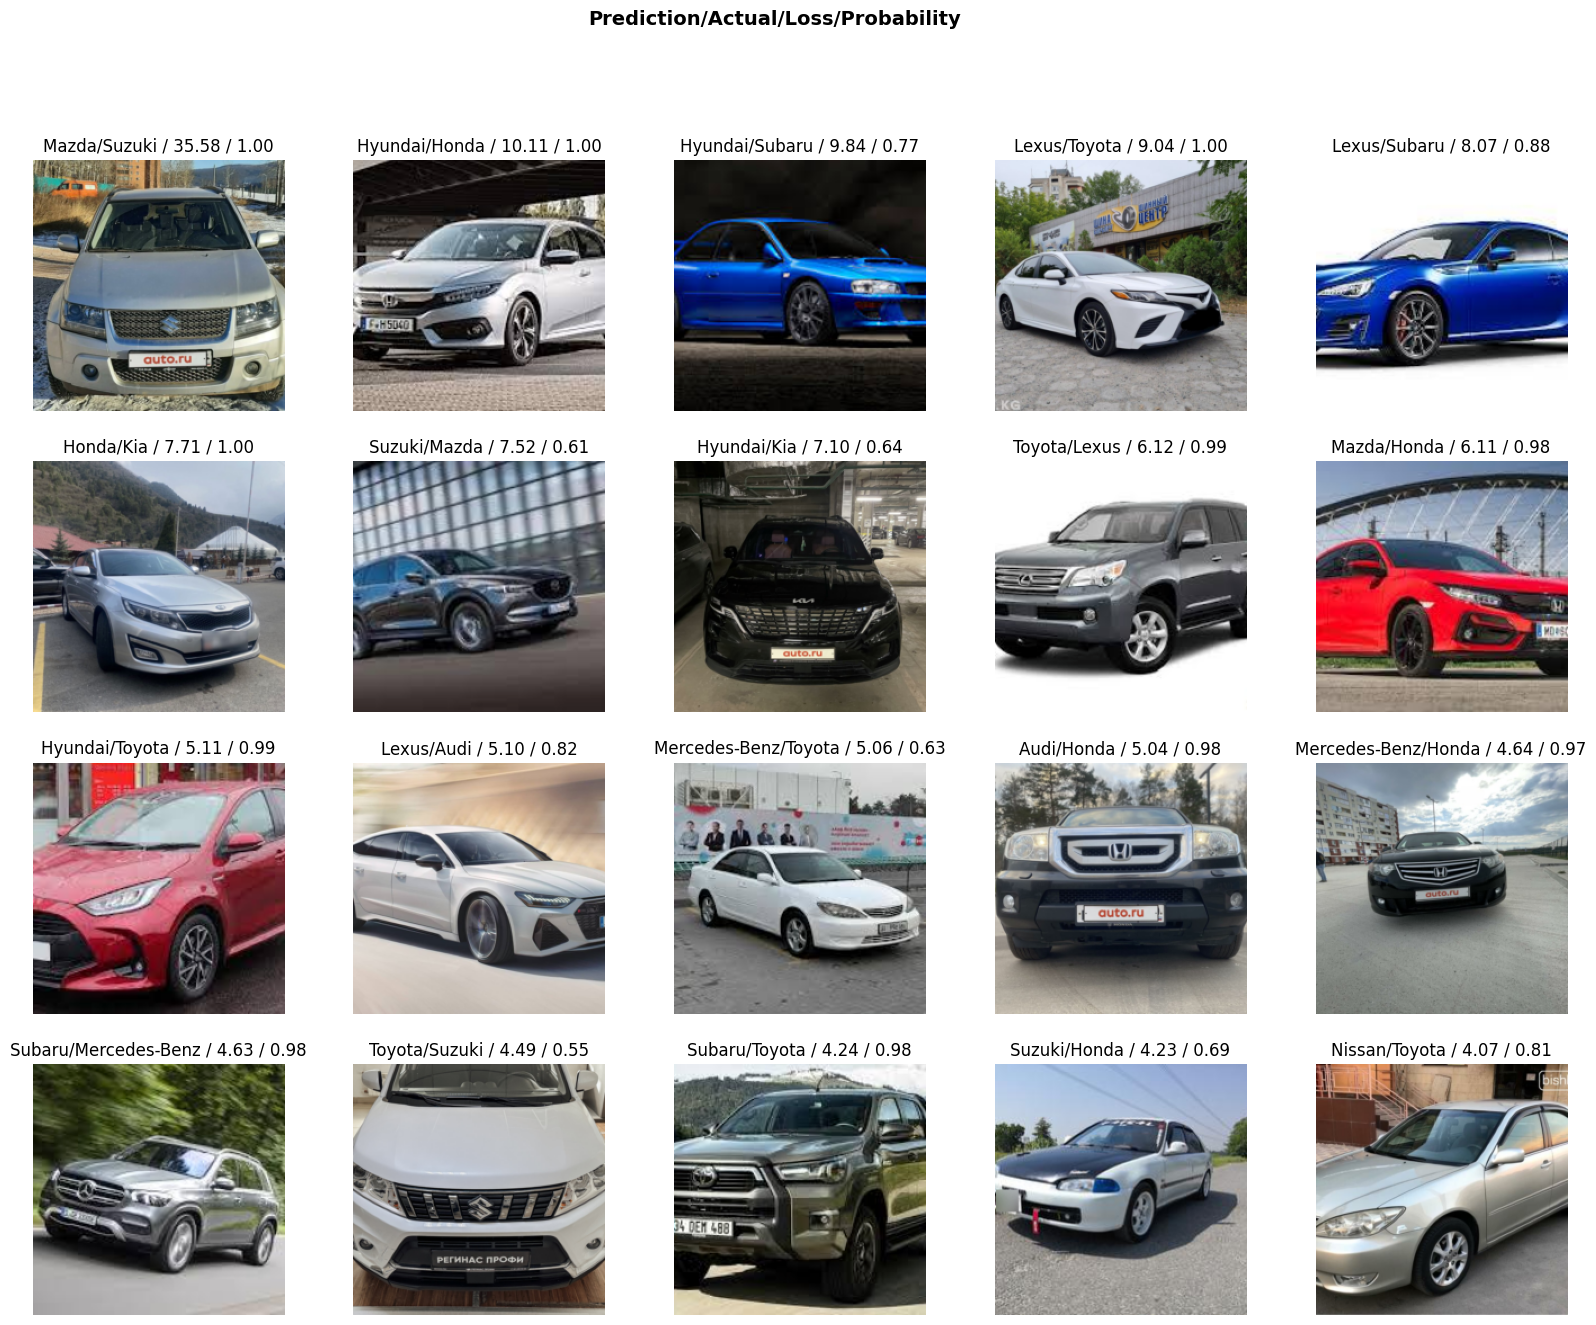

In [10]:
# Comparing the predicted and actual output
interp.plot_top_losses(20,figsize = (20,15))

In [11]:
im = Image.open('test_imgs/331699433118_file.jpg')
im_t = cast(array(im), TensorImage)

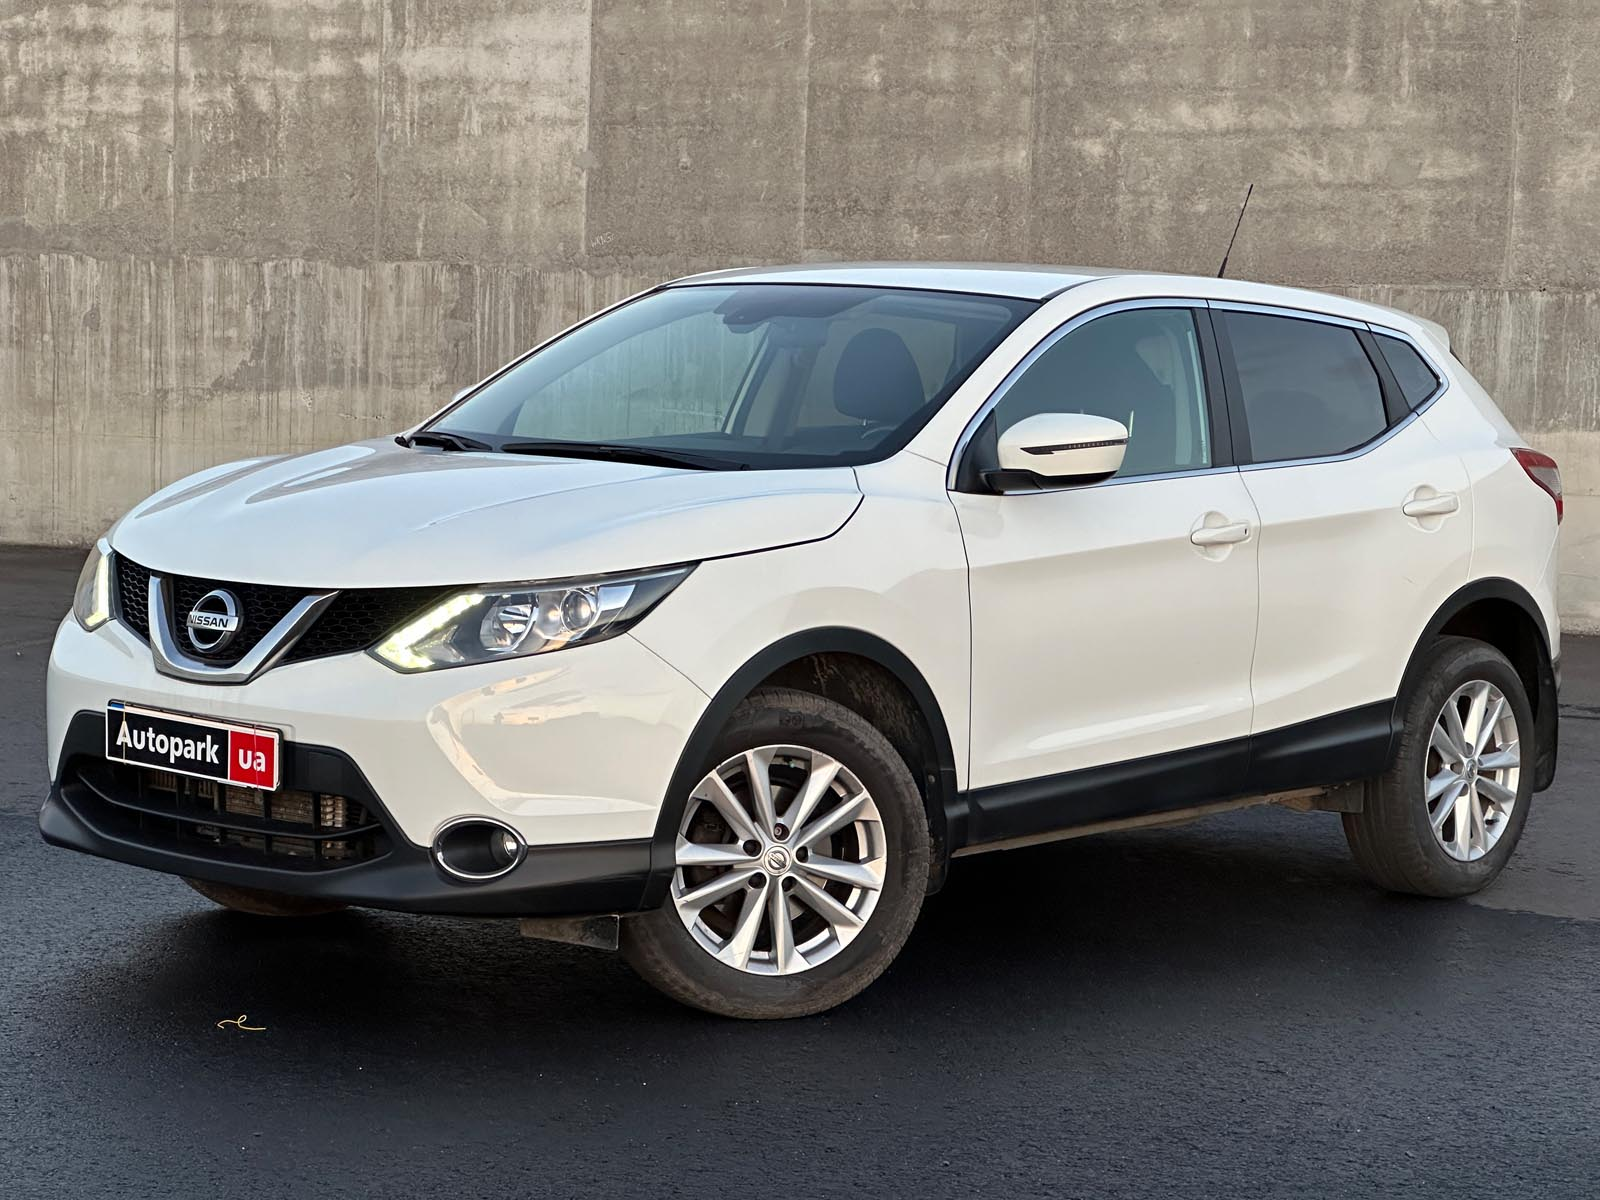

In [12]:
im

In [13]:
im_t #showing image tensor

TensorImage([[[188, 179, 164],
              [202, 193, 178],
              [192, 183, 168],
              ...,
              [157, 148, 133],
              [156, 147, 132],
              [155, 146, 131]],

             [[179, 170, 155],
              [191, 182, 167],
              [184, 175, 160],
              ...,
              [160, 151, 136],
              [158, 149, 134],
              [156, 147, 132]],

             [[170, 161, 146],
              [180, 171, 156],
              [177, 168, 153],
              ...,
              [163, 154, 139],
              [160, 151, 136],
              [158, 149, 134]],

             ...,

             [[ 82,  92, 104],
              [ 82,  92, 104],
              [ 85,  95, 107],
              ...,
              [ 88,  98, 108],
              [ 88,  98, 108],
              [ 92, 102, 112]],

             [[ 74,  84,  96],
              [ 78,  88, 100],
              [ 85,  95, 107],
              ...,
              [ 79,  89,  99],
          

In [14]:
learn.export(Path("export.pkl"))
learn.model_dir = ""
learn.save("stage-1_v5")
learn = load_learner('export.pkl')

In [1]:
from PIL import Image
img = Image.open('test_imgs/ee0e8b8938669eb10bffc074f06e4ade_640x480.jpg')

# Resize the image to 224x224
img_resized = img.resize((224, 224))
pred, pred_idx, probs = learn.predict(img_resized)
im_t = cast(array(img_resized), TensorImage)
# Print the predicted label and probability
print(f"Predicted label: {pred}, probability: {probs[pred_idx]:.4f}")
img

NameError: name 'learn' is not defined

Predicted label: Hyundai, probability: 0.9799


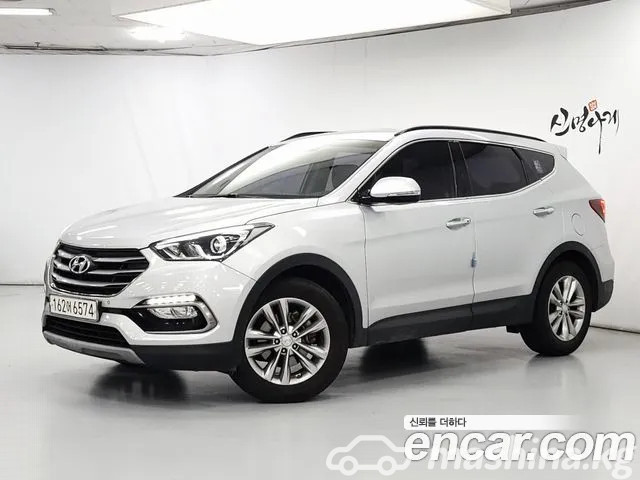

In [18]:
img = Image.open('test_imgs/a01c8db84a1676d6ee5fb7afeb9279b6_640x480.jpg') # Resize the image to 224x224
img_resized = img.resize((224, 224))
pred, pred_idx, probs = learn.predict(img_resized)
print(f"Predicted label: {pred}, probability: {probs[pred_idx]:.4f}")
img

In [9]:
from fastai.vision.all import *
from PIL import Image

In [10]:
data = ImageDataLoaders.from_folder('../imgs_zip/imgs/train', train='.', valid_pct=0.2, 
                                   size=224, item_tfms=Resize(224))

In [15]:
learn = cnn_learner(data, models.resnet18, model_dir='')

In [16]:
learn.export(Path("/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/export.pkl"))
learn.model_dir = ""

In [17]:
learn = load_learner('/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/export.pkl')

In [18]:
learn.load("/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/model/stage-1")

Predicted class: Honda
Predicted probabilities: 0.5439


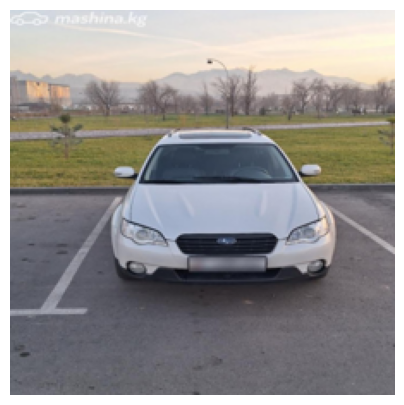

In [32]:
def predict_image(image_path):
    # Open the image
    img = Image.open(image_path)

    # Resize the image (if necessary)
    img_resized = img.resize((224, 224))

    # Predict
    pred_class, pred_idx, probs = learn.predict(img_resized)

    # Print results
    print(f"Predicted class: {pred_class}")
    print(f"Predicted probabilities: {probs[pred_idx]:.4f}")

    # Display the image
    img_resized.show()

# Example usage
predict_image('test_images/11.jpg')